<a href="https://colab.research.google.com/github/amirhsarkaboudi/FlockingModelSimulation/blob/main/ABM_Flocking_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**libs**

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

**Agents operation**

In [38]:
class Agent:
    def __init__(self, x , y, grid_size):
        self.position = np.array([x, y], dtype="float")
        self.velocity = np.random.uniform(-1, 1, 2)
        self.grid_size = grid_size
        self.flockmates = []
        self.nearest_neighbor = None

    def move(self):
        self.position += self.velocity
        self.position[0] %= self.grid_size
        self.position[1] %= self.grid_size

    def find_flockmates(self, agents, vision_radius):
        self.flockmates = [other for other in agents if other != self and np.linalg.norm(self.position - other.position) < vision_radius]

    def find_nearest_neighbor(self):
        if self.flockmates:
            self.nearest_neighbor = min(self.flockmates, key=lambda other: np.linalg.norm(self.position - other.position))

    def separate(self, minimum_separation, max_separate_turn):
        if self.nearest_neighbor and np.linalg.norm(self.position - self.nearest_neighbor.position) < minimum_separation:
            direction_away = self.position - self.nearest_neighbor.position
            self.velocity += 0.01 * direction_away

    def align(self, max_align_turn):
        if self.flockmates:
            avg_velocity = np.mean([mate.velocity for mate in self.flockmates], axis=0)
            self.velocity += 0.01 * (avg_velocity - self.velocity)

    def cohere(self, max_cohere_turn):
        if self.flockmates:
            avg_position = np.mean([mate.position for mate in self.flockmates], axis=0)
            direction_to_flock = avg_position - self.position
            self.velocity += 0.01 * direction_to_flock

**modeling**

In [39]:

class FlockingModel:
    def __init__(self, num_agents, grid_size, vision, min_separation):
        self.agents = [Agent(np.random.uniform(0, grid_size), np.random.uniform(0, grid_size), grid_size) for _ in range(num_agents)]
        self.grid_size = grid_size
        self.vision = vision
        self.min_separation = min_separation

    def update(self):
        for agent in self.agents:
            agent.find_flockmates(self.agents, self.vision)
            agent.find_nearest_neighbor()
            agent.separate(self.min_separation, max_separate_turn=15)
            agent.align(max_align_turn=10)
            agent.cohere(max_cohere_turn=10)
            agent.move()

    def get_positions(self):
        return [(agent.position[0], agent.position[1]) for agent in self.agents]

**variables**

In [46]:
num_agents = 100
grid_size = 100
vision = 15
min_separation = 5
num_steps = 500

model1 = FlockingModel(num_agents=num_agents, grid_size=grid_size, vision=vision, min_separation=min_separation)

**plot**

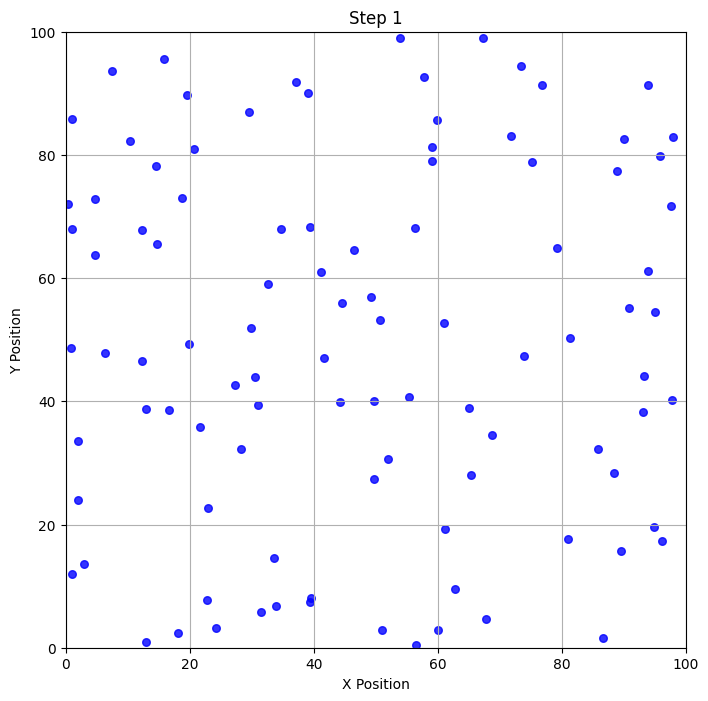

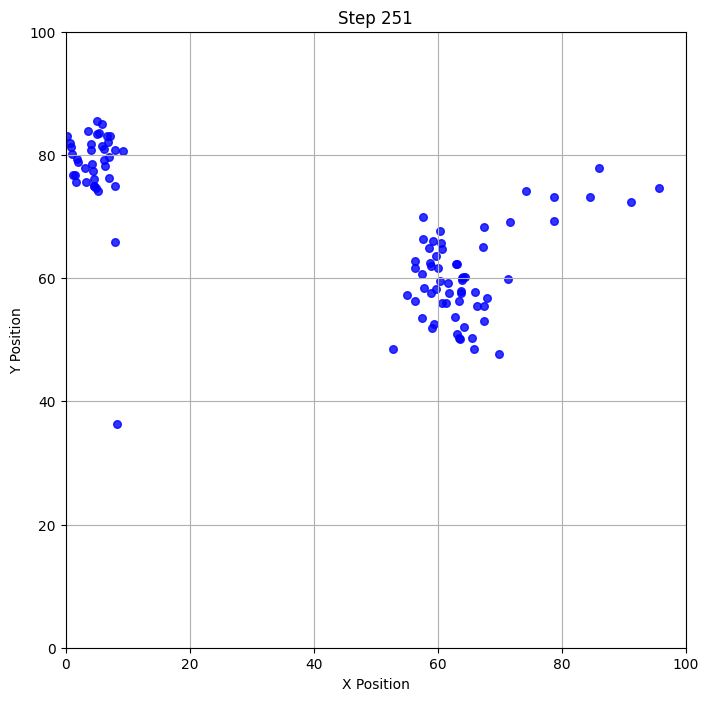

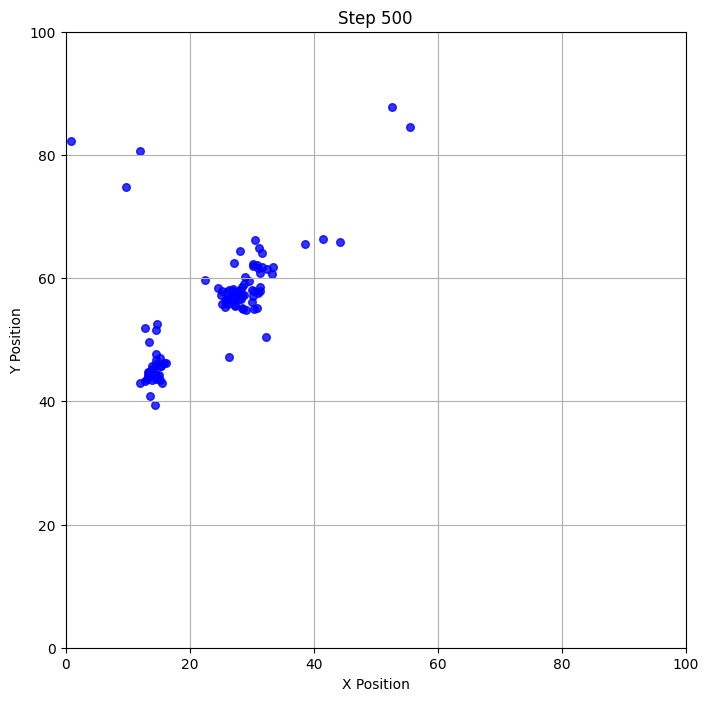

In [47]:
for step in range(num_steps):
    model1.update()
    positions = model1.get_positions()
    x_positions = [pos[0] for pos in positions]
    y_positions = [pos[1] for pos in positions]

    if step == 0 or step == num_steps // 2 or step == num_steps - 1:
        plt.figure(figsize=(8, 8))
        plt.scatter(x_positions, y_positions, c='blue', marker='o', s=30, alpha=0.8)
        plt.xlim(0, grid_size)
        plt.ylim(0, grid_size)
        plt.title(f"Step {step + 1}")
        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.grid(True)
        plt.show()
        plt.pause(0.1)